In [22]:
import pandas as pd
import joblib


df = pd.read_csv("06 - dataset_limpio.csv") 

# Modelo 2 – Support Vector Machine (SVM)

from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd


X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [23]:
#  2. Estandarizar datos

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, "scaler_svm.pkl")


['scaler_svm.pkl']

Al aplicar class_weight='balanced' en LinearSVC, el modelo logra un recall del 75% en la detección de diabetes, lo que representa una mejora crítica en el contexto del problema, aunque a costa de una caída en la precisión y la exactitud global.


In [24]:

# Submuestra razonable (25,000 ya está bien)
X_sub = X_train_scaled[:25000]
y_sub = y_train.iloc[:25000]

param_grid = {
    'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10]
}

svc = LinearSVC(max_iter=10000, class_weight='balanced')

grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=3,
    scoring='recall',  # o 'f1' si quieres equilibrio
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_sub, y_sub)

best_svm = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)


Fitting 3 folds for each of 7 candidates, totalling 21 fits
Mejores hiperparámetros: {'C': 0.001}


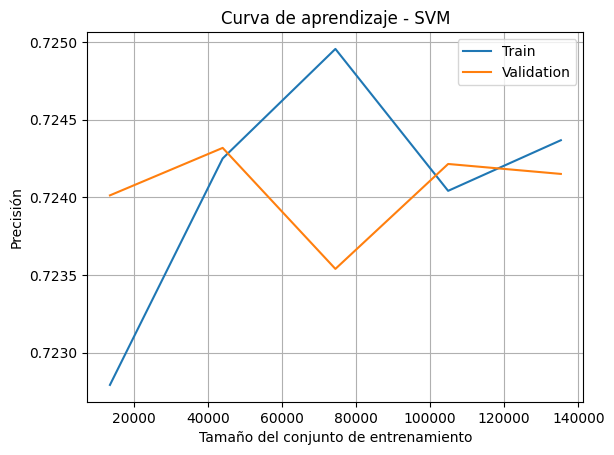

In [25]:
#4. Curva de aprendizaje

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    best_svm, X_train_scaled, y_train, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Validation")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.title("Curva de aprendizaje - SVM")
plt.legend()
plt.grid()
plt.show()


In [26]:
# 5. Evaluación en test completo

y_pred = best_svm.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


joblib.dump(best_svm, "modelo_linearsvc.pkl")

[[31628 12378]
 [ 1663  5067]]
              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     44006
         1.0       0.29      0.75      0.42      6730

    accuracy                           0.72     50736
   macro avg       0.62      0.74      0.62     50736
weighted avg       0.86      0.72      0.77     50736



['modelo_linearsvc.pkl']

El modelo SVM, tras ser ajustado con class_weight='balanced' y optimizado con scoring='recall', alcanza un desempeño comparable al mejor Random Forest, pero con menor complejidad y mayor interpretabilidad. Es especialmente valioso en contextos donde la transparencia del modelo es importante.